# EDA and Data Cleaning

In [1]:
# importing useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading in the dataset
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe() # a quick summary of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum().sum() # checking for Nan values

0

In [5]:
# checking for imbalance
val_count = df['Class'].value_counts()
val_count

0    284315
1       492
Name: Class, dtype: int64

In [6]:
100 * val_count[1] / val_count.sum() # checking percentage of minority class

0.1727485630620034

### The dataset is heavily unbalanced.

### Correlation check

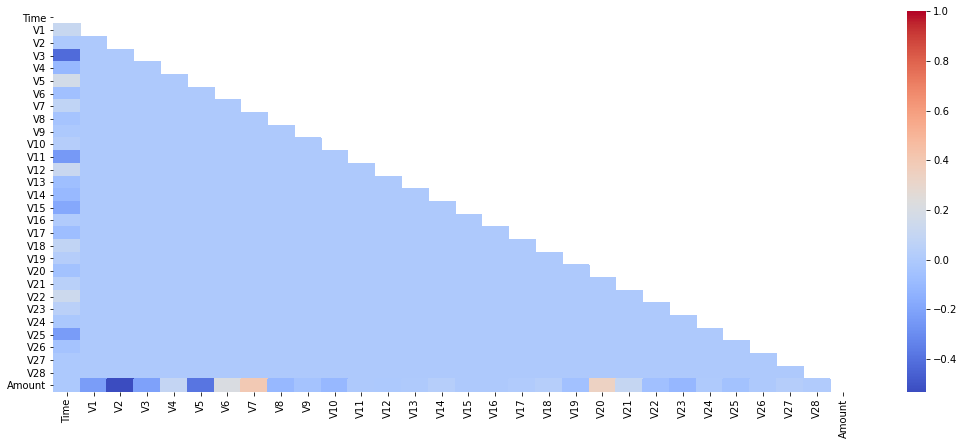

In [7]:
df_corr = df.iloc[:, :-1].corr() # gets the correlation matrix

mask = np.triu(np.ones((30, 30))) #to mask out the upper triangular matrix of the heatmap because the
                                  # lower triangular matrix alone contains all collinearities.

plt.figure(figsize=(18, 7)) 
sns.heatmap(df_corr, mask=mask, xticklabels=True, yticklabels=True, cmap='coolwarm')
#xticklabels and yticklabels are set to True to display all columns in the heatmap

plt.show()


### We expected the little collinearity because features v1 to v28 have been transformed using PCA, so they are expected to be independent.

## By PCA

### Exploring the PCA features

### We know that PCA results are such that the features are sorted in descending order of explained variance. Let's confirm that in our PCA features.

In [8]:
# calculating the variance fraction (aka variance ratio)
variance = []
for vi in df.columns[1:29]:
    variance.append(df[vi].var())
variance = np.array(variance) / sum(variance)

In [9]:
variance

array([0.12483757, 0.08872945, 0.07480934, 0.06523148, 0.06199045,
       0.05775592, 0.04979852, 0.04641696, 0.03927497, 0.03857867,
       0.03390148, 0.03248758, 0.03223271, 0.02990076, 0.02726173,
       0.02498448, 0.02347316, 0.0228603 , 0.02156271, 0.01933907,
       0.01755591, 0.01713671, 0.01268881, 0.01193577, 0.00884199,
       0.00756684, 0.00530131, 0.00354534])

### We see that the PCA features are indeed sorted in descending order of explained variance.

In [10]:
# checking the cummulative sum to see how the cummulative explained variance fraction increases
c_variance = np.cumsum(variance)
c_variance

array([0.12483757, 0.21356702, 0.28837636, 0.35360784, 0.41559829,
       0.47335421, 0.52315273, 0.56956969, 0.60884466, 0.64742333,
       0.68132481, 0.71381239, 0.7460451 , 0.77594586, 0.80320759,
       0.82819207, 0.85166522, 0.87452552, 0.89608823, 0.91542731,
       0.93298321, 0.95011992, 0.96280874, 0.97474451, 0.9835865 ,
       0.99115334, 0.99645466, 1.        ])

In [11]:
# defining a function to return the number of pca features needed to explain a given variance fraction
def n_from_cumsum(frac):
    res = c_variance[c_variance <= frac]
    return len(res)

In [12]:
n_from_cumsum(0.8)

14

In [13]:
n_from_cumsum(0.9)

19

## Scattered plots of some PCA features

In [14]:
def plot_features(x, y):
    scatter = plt.scatter(df[x], df[y], c=df['Class'])
    plt.legend(handles=scatter.legend_elements()[0], labels=['not_fraud', 'fraud'])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

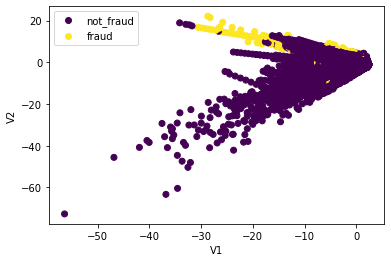

In [15]:
plot_features('V1', 'V2')

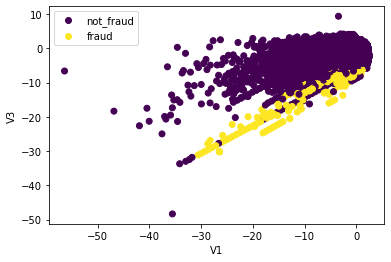

In [16]:
plot_features('V1', 'V3')

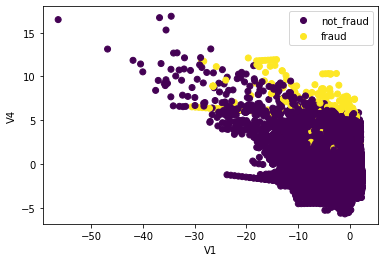

In [17]:
plot_features('V1', 'V4')

## By Time

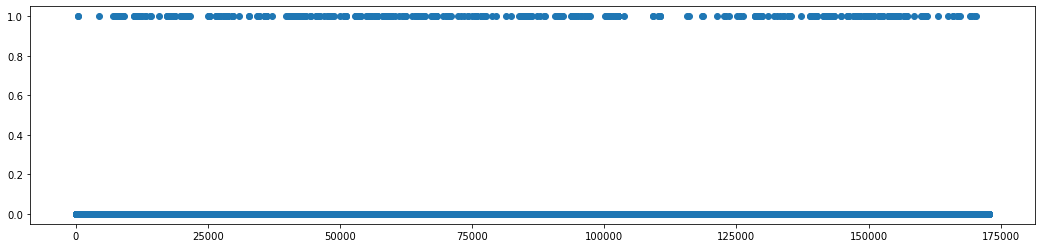

In [18]:
plt.figure(figsize=(18, 4)) 
plt.scatter(df['Time'], df['Class'])
plt.show()

### We see a constant non-fraudulent transaction throughout the duration of the dataset but some gaps in time for fraudulent activities. Those gaps tend to repeat themselves approximately in intervals.

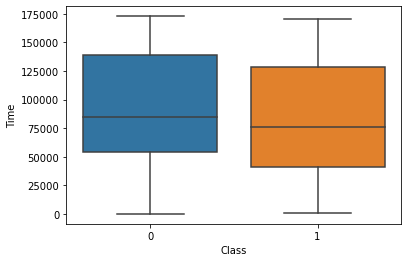

In [19]:
# using box plot to check the distribution of fraudulent and non-fraudulent transactions with time.
sns.boxplot(y='Time', x='Class', data=df)
plt.show()

In [20]:
fraud = df[df['Class'] == 1] # pulling out rows where transaction is fraud
not_fraud = df[df['Class'] == 0] # pulling out rows where transaction is not fraud

In [21]:
fraud['Time'].describe() # quick summary 

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [22]:
not_fraud['Time'].describe() # quick summary

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

### There is a slight different between the elapsed time for fraudulent and non-fraudulent activities for example, the starting and ending time. 

## By Amount

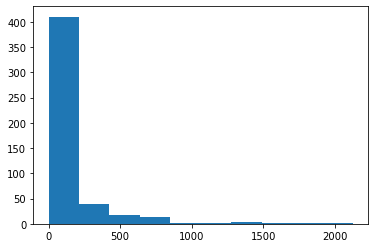

In [23]:
plt.hist(fraud['Amount']) # checking amount involved in fraud
plt.show()

### Amounts associated with fraud are more of lower values (<167)

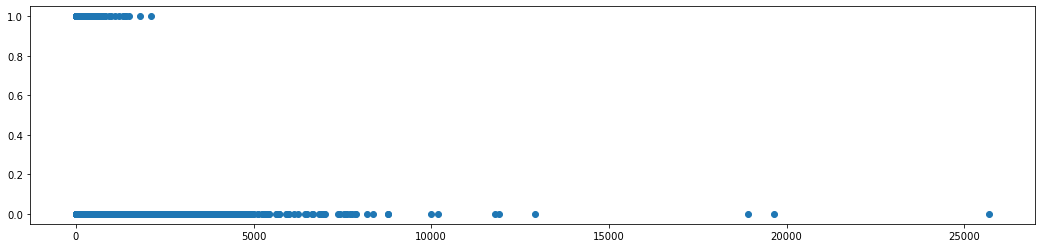

In [24]:
plt.figure(figsize=(18, 4)) 
plt.scatter(df['Amount'], df['Class'])
plt.show()

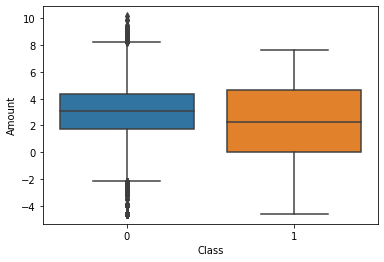

In [25]:
sns.boxplot(y='Amount', x=df['Class'], data=np.log(df)) # using the log of the Amount due to the 
                                                        # large skewness
plt.show()

In [26]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
not_fraud['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### There is a slight different between the Amount for fraudulent and non-fraudulent activities for example, the max Amount. 

## Feature Selection

### For our feature selection, we will be using Recursive Feature Elimination Cross Validation (RFECV), we will use LogisticRegression as our baseline model and all our splits will be stratified.

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

## Only PCA Features

### Modeling using only PCA features without scaling

In [29]:
X = df.iloc[:, 1:29]
y = df.iloc[:, -1]

### Due to the huge class imbalance, we will be setting the class weights to penalize misclassification of the minority class more than the majority class. We could have simply set the ````class_weight```` to 'balanced' but this will result in lower f1 score because it uses the formula: $ w_{i} = \frac{n\_samples}{n\_classes \times n_{i}} $ 
### Since $\frac{n\_samples}{n\_classes}$ is constant, we can think of the weight for class i as $w_{i} = K \times \frac{1}{n_{i}}$ which is essentially a scaling of the weight $\frac{1}{n_{i}}$ by K. 
### Since our dataset is heavily unbalanced, using 'balanced' will make the weights to be too large and will make our model iterate more to reach the minimum gradient. Logistic Regressor default ````max_iter```` is 100 and after trying using 'balanced', the f1_score was poor because 100 iterations wasn't enough. To make our model converge faster to the minimum gradient, we will simpl use our weights as $\frac{1}{n_{i}}$ without multiplying by K. This wouldn't change anything because the ratio of weights of each class is still preserved. This will only make our baseline model converge faster.

In [30]:
weights = 1 / val_count
dict(weights)

{0: 3.51722561243691e-06, 1: 0.0020325203252032522}

In [31]:
baseline_model = LogisticRegression(class_weight=dict(weights))
cv = StratifiedKFold(n_splits=4, random_state=1)

In [32]:
feature_elimination = RFECV(estimator=baseline_model, cv=cv, scoring='f1', n_jobs=4)
feature_elimination.fit(X, y);

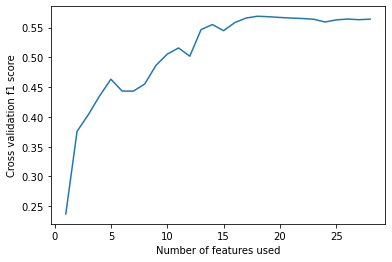

In [33]:
rfecv_scores = feature_elimination.grid_scores_
plt.plot(range(1, len(rfecv_scores)+1), rfecv_scores)
plt.xlabel('Number of features used')
plt.ylabel('Cross validation f1 score')
plt.show()

In [34]:
rfecv_scores.max() # checking the best f1_score

0.5691732784839253

In [35]:
feature_elimination.n_features_ # checking the best number of features to use

18

In [36]:
feature_elimination.ranking_ # checking the ranking of the features

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,  1,
        5,  2,  9,  1,  3,  1, 10, 11,  4,  6,  8])

In [37]:
feature_elimination.support_ # checking the masking array to filter out the best features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False])

## Using all features

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaled_df = df.iloc[:, :-1].copy()
scaled_df = scaler.fit_transform(scaled_df) 

In [40]:
baseline_model2 = LogisticRegression(class_weight=dict(weights))

In [41]:
feature_elimination2 = RFECV(estimator=baseline_model2, cv=cv, scoring='f1', n_jobs=4)
feature_elimination2.fit(scaled_df, y);

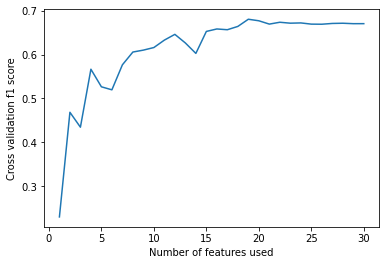

In [42]:
rfecv_scores2 = feature_elimination2.grid_scores_
plt.plot(range(1, len(rfecv_scores2)+1), rfecv_scores2)
plt.xlabel('Number of features used')
plt.ylabel('Cross validation f1 score')
plt.show()

In [43]:
rfecv_scores2.max() # checking the best f1_score

0.6807954175099398

In [44]:
feature_elimination2.n_features_ # checking the best number of features to use

19

In [45]:
feature_elimination2.ranking_ # checking the ranking of the features

array([ 7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1,
        1,  8,  4, 11,  1,  6,  1, 10, 12,  5,  2,  3,  1])

In [46]:
feature_elimination2.support_ # checking the masking array to filter out the best features

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True])

## Only scaled PCA features

In [47]:
X3 = scaled_df[:, 1:29]

In [48]:
baseline_model3 = LogisticRegression(class_weight=dict(weights))

In [49]:
feature_elimination3 = RFECV(estimator=baseline_model3, cv=cv, scoring='f1', n_jobs=4)
feature_elimination3.fit(X3, y);

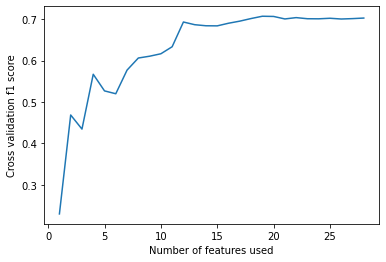

In [50]:
rfecv_scores3 = feature_elimination3.grid_scores_
plt.plot(range(1, len(rfecv_scores3)+1), rfecv_scores3)
plt.xlabel('Number of features used')
plt.ylabel('Cross validation f1 score')
plt.show()

In [51]:
rfecv_scores3.max() # checking the best f1_score

0.7067929903615544

In [52]:
feature_elimination3.n_features_ # checking the best number of features to use

19

In [53]:
feature_elimination3.ranking_ # checking the ranking of the features

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,  1,
        6,  3,  8,  1,  5,  1,  9, 10,  4,  1,  2])

In [54]:
feature_elimination3.support_ # checking the masking array to filter out the best features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False])

### Using only Scaled PCA seems to be the best.

## Let's see the important features.

In [55]:
important_features = df.columns[1:29][feature_elimination3.support_]
important_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V16', 'V17', 'V21', 'V23', 'V27'],
      dtype='object')

### Basically using all scaled PCA features apart from V15, V18, V19, V20, V22, V24, V25, V26 and V28

### Using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### When using SMOTE, it is important that SMOTE be applied to the training set only, after splitting the dataset into train and test set. This is to avoid some of the oversampled data to be seen in both training and testing set. Imblearn's Pipeline will handle this for us automatically.

In [57]:
baseline_model4 = LogisticRegression()
smote = SMOTE(random_state=1)
pipe = Pipeline([('smote', smote), ('model', baseline_model4)])

In [58]:
smote_X = X3[:, feature_elimination3.support_] # using the 19 best features
smote_X.shape

(284807, 19)

In [59]:
scores = cross_val_score(pipe, smote_X, y, scoring='f1', cv=cv, n_jobs=4)

In [60]:
scores

array([0.09063444, 0.18732782, 0.06511367, 0.1233993 ])

In [61]:
scores.mean()

0.11661880863738695

## We can then conclude that using class weight performs better than SMOTE. We will build our models based on this conclusion...Using only the 19 scaled PCA features and setting class weight is the best preprocessing. 